<div style="text-align: center; font-family: Arial, sans-serif;">
    <h1>
        <a href="https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip" target="_blank" style="text-decoration: none; color: #2a7ae2;">
            FoodVision: Classifying 10 Food Categories
        </a>
    </h1>
    <h3>
        A TensorFlow Project from
        <a href="https://github.com/mrdbourke/tensorflow-deep-learning" target="_blank" style="text-decoration: none; color: #2a7ae2;">
            Mr. Bourke’s Deep Learning Course
        </a>
    </h3>
    <h4>By Mohammad Nourbakhsh Marvast</h4>
</div>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading Data

In [2]:
!wget -O food.zip https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-05-18 06:42:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘food.zip’

food.zip            100%[===================>] 495.13M  23.2MB/s    in 23s     

2025-05-18 06:42:31 (21.5 MB/s) - ‘food.zip’ saved [519183241/519183241]



In [3]:
!unzip food.zip -d food_classes

Streaming output truncated to the last 5000 lines.
  inflating: food_classes/10_food_classes_all_data/train/hamburger/2119225.jpg  
  inflating: food_classes/__MACOSX/10_food_classes_all_data/train/hamburger/._2119225.jpg  
  inflating: food_classes/10_food_classes_all_data/train/hamburger/22923.jpg  
  inflating: food_classes/__MACOSX/10_food_classes_all_data/train/hamburger/._22923.jpg  
  inflating: food_classes/10_food_classes_all_data/train/hamburger/3894442.jpg  
  inflating: food_classes/__MACOSX/10_food_classes_all_data/train/hamburger/._3894442.jpg  
  inflating: food_classes/10_food_classes_all_data/train/hamburger/1101890.jpg  
  inflating: food_classes/__MACOSX/10_food_classes_all_data/train/hamburger/._1101890.jpg  
  inflating: food_classes/10_food_classes_all_data/train/hamburger/2715888.jpg  
  inflating: food_classes/__MACOSX/10_food_classes_all_data/train/hamburger/._2715888.jpg  
  inflating: food_classes/10_food_classes_all_data/train/hamburger/554363.jpg  
  inflat

In [4]:
import os

In [5]:
for path, dirs, files in os.walk('food_classes'):
  print(f'There are {len(dirs)} directories and {len(files)} images in {path}')

There are 2 directories and 0 images in food_classes
There are 2 directories and 0 images in food_classes/10_food_classes_all_data
There are 10 directories and 0 images in food_classes/10_food_classes_all_data/test
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/steak
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in food_classes/10_food_classes_all_data/test/ice_cream
There are 0 directories and

In [6]:
train_dir = 'food_classes/10_food_classes_all_data/train'
test_dir = 'food_classes/10_food_classes_all_data/test'

img_height = 224
img_width = 224
batch_size = 32

In [8]:
# Load data with tensorflow

img_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_data = img_data_gen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
    )

val_data = img_data_gen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
    )

test_img_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

test_data = test_img_data_gen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True
    )

Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
class_indices = train_data.class_indices
class_names = list(class_indices.keys())
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

# Visualize! Visualize! Visualize!

In [10]:
def random_plot(data):
  # Assuming 'train_generator' is your DirectoryIterator
  class_indices = data.class_indices
  class_names = list(class_indices.keys())

  # Get a batch of images and labels
  images, labels = next(data)

  # Select 9 random indices
  random_indices = np.random.choice(len(images), size=9, replace=False)

  # Create a 3x3 grid to display images
  fig, axes = plt.subplots(3, 3, figsize=(10, 10))
  for i, ax in enumerate(axes.flat):
    idx = random_indices[i]
    ax.imshow(images[idx])
    ax.set_title(class_names[np.argmax(labels[idx])])
    ax.axis('off')

  plt.suptitle('Random Images from Dataset')
  plt.tight_layout()
  plt.show()

  plt.show()

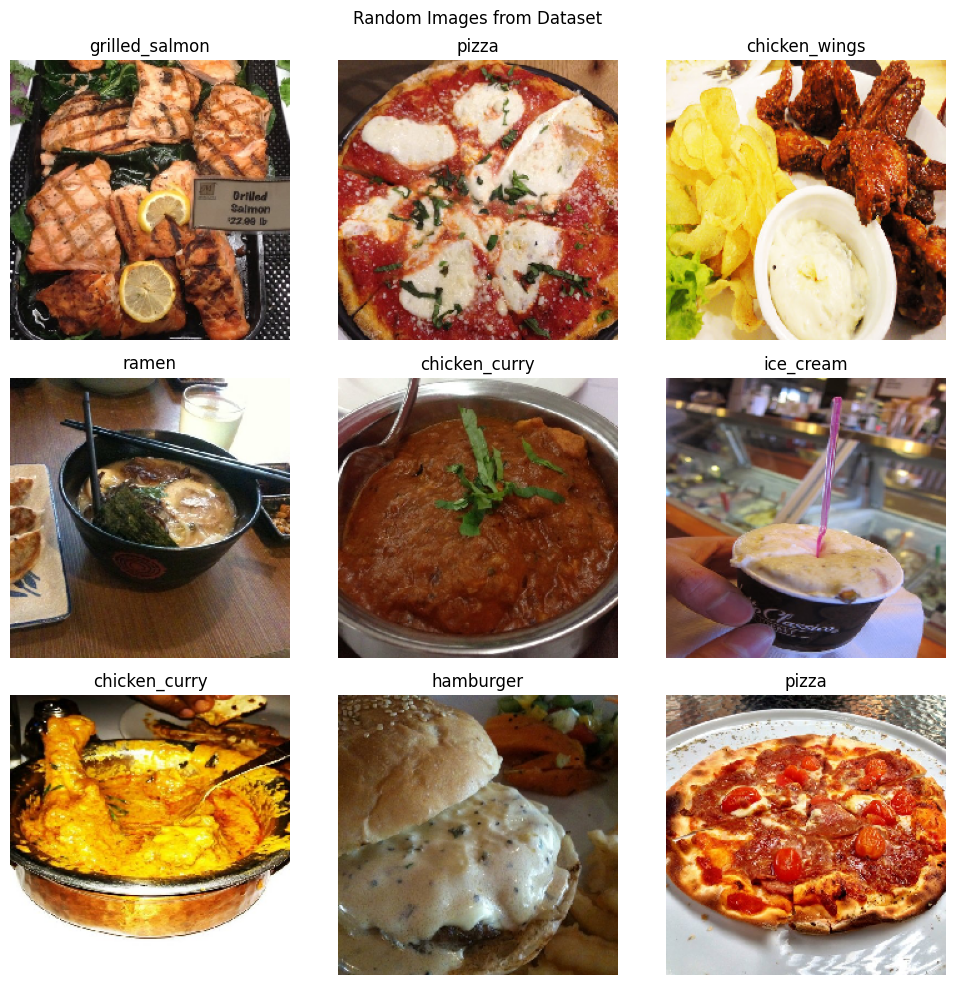

In [11]:
random_plot(train_data)

# Model Designing

## Data Augmentation

In [12]:
augmentation= tf.keras.Sequential()

augmentation.add(tf.keras.layers.InputLayer(shape=(img_height, img_width, 3)))
augmentation.add(tf.keras.layers.RandomFlip('horizontal'))
augmentation.add(tf.keras.layers.RandomFlip('vertical'))
augmentation.add(tf.keras.layers.RandomRotation(0.2))
augmentation.add(tf.keras.layers.RandomZoom(0.2))
augmentation.add(tf.keras.layers.RandomTranslation(0.2, 0.2))

## convolutional Neural Network Model

In [13]:
model = tf.keras.Sequential()

model.add(augmentation)

model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(256, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(512, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics= ['accuracy']
              )

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,469,162 (78.08 MB)

 Trainable params: 20,469,162 (78.08 MB)

 Non-trainable params: 0 (0.00 B)

## Early Callbacks

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
model.fit(train_data,
          epochs= 60,
          steps_per_epoch= len(train_data),
          validation_data= val_data,
          validation_steps= len(val_data),
          callbacks=[early_stopping])

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - accuracy: 0.0847 - loss: 2.3081 - val_accuracy: 0.1560 - val_loss: 2.2409
Epoch 2/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.1518 - loss: 2.2492 - val_accuracy: 0.1873 - val_loss: 2.1813
Epoch 3/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.1725 - loss: 2.2006 - val_accuracy: 0.1793 - val_loss: 2.1843
Epoch 4/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 140ms/step - accuracy: 0.1819 - loss: 2.1746 - val_accuracy: 0.1953 - val_loss: 2.2082
Epoch 5/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.1813 - loss: 2.1794 - val_accuracy: 0.2053 - val_loss: 2.1449
Epoch 6/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 142ms/step - accuracy: 0.1906 - loss: 2.1602 - val_accuracy: 0.2307 - val_loss: 2.1299
Epoch 7/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - accuracy: 0.1957 - loss: 2.1429 - val_accuracy: 0.1713 - val_loss: 2.2336
Epoch 8/60
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 143ms/step - accuracy: 0.1909 - loss: 2.1363 - val

## Transfer Learning

In [17]:
model_url = 'https://www.kaggle.com/models/google/efficientnet/TensorFlow1/b0-feature-vector/1'

In [18]:
#!wget -O efficientnet.tar.gz https://www.kaggle.com/api/v1/models/tensorflow/efficientnet/tensorFlow2/b0-feature-vector/1/download

In [19]:
#!mkdir -p efficientnet
#!tar -xf efficientnet.tar.gz -C efficientnet

In [20]:
import tensorflow_hub as hub

# Use Keras 2.
version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

In [39]:
def create_model(model_url, num_classes= 10, lr= 0.001):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(img_height, img_width, 3))

  transfer_model = keras.Sequential([
        feature_extractor_layer,
        keras.layers.Dense(num_classes, activation='softmax', name='output_layer')
    ])


  transfer_model.compile(optimizer= keras.optimizers.Adam(learning_rate= lr),
                         loss= keras.losses.CategoricalCrossentropy(),
                         metrics= ['accuracy']
                         )
  return transfer_model

In [40]:
efficientnet_model = create_model(model_url, num_classes= 10, lr= 0.001)

In [41]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [42]:
efficientnet_model.fit(train_data,
                       epochs= 5,
                       steps_per_epoch= len(train_data),
                       validation_data= val_data,
                       validation_steps= len(val_data),
                       )

Epoch 1/5
188/188 [==============================] - 28s 130ms/step - loss: 0.8762 - accuracy: 0.7593 - val_loss: 0.5719 - val_accuracy: 0.8347
Epoch 2/5
188/188 [==============================] - 28s 152ms/step - loss: 0.4828 - accuracy: 0.8578 - val_loss: 0.4818 - val_accuracy: 0.8507
Epoch 3/5
188/188 [==============================] - 29s 154ms/step - loss: 0.3937 - accuracy: 0.8767 - val_loss: 0.4373 - val_accuracy: 0.8700
Epoch 4/5
188/188 [==============================] - 24s 128ms/step - loss: 0.3421 - accuracy: 0.8983 - val_loss: 0.4146 - val_accuracy: 0.8647
Epoch 5/5
188/188 [==============================] - 28s 150ms/step - loss: 0.3108 - accuracy: 0.9055 - val_loss: 0.4270 - val_accuracy: 0.8653


# Model Evaluation

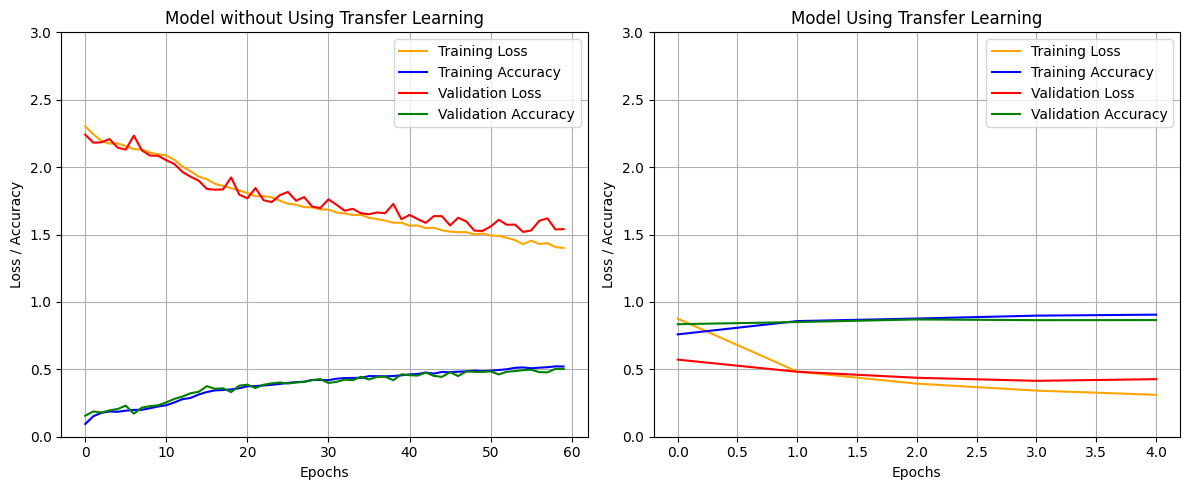

In [43]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the model without transfer learning
history_df = pd.DataFrame(model.history.history)
axes[0].plot(history_df['loss'], label='Training Loss', color= 'orange')
axes[0].plot(history_df['accuracy'], label='Training Accuracy', color= 'b')
axes[0].plot(history_df['val_loss'], label='Validation Loss', color= 'r')
axes[0].plot(history_df['val_accuracy'], label='Validation Accuracy', color= 'g')
axes[0].set_title('Model without Using Transfer Learning')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss / Accuracy')
axes[0].set_ylim([0, 3])  # Set the y-axis limits to [0, 3]
axes[0].legend()
axes[0].grid(True)  # Optional: Add grid for better readability

# Plot for the model with transfer learning
efficientnet_history_df = pd.DataFrame(efficientnet_model.history.history)
axes[1].plot(efficientnet_history_df['loss'], label='Training Loss', color= 'orange')
axes[1].plot(efficientnet_history_df['accuracy'], label='Training Accuracy', color= 'b')
axes[1].plot(efficientnet_history_df['val_loss'], label='Validation Loss', color= 'r')
axes[1].plot(efficientnet_history_df['val_accuracy'], label='Validation Accuracy', color= 'g')
axes[1].set_title('Model Using Transfer Learning')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss / Accuracy')
axes[1].set_ylim([0, 3])  # Set the y-axis limits to [0, 3]
axes[1].legend()
axes[1].grid(True)  # Optional: Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#pd.DataFrame(model.history.history).plot()

## Evaluate on Test Data

In [51]:
model.evaluate(test_data, return_dict=True)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.5359 - loss: 1.4050


{'accuracy': 0.5424000024795532, 'loss': 1.4076993465423584}

In [52]:
steps = len(test_data)
results = efficientnet_model.evaluate(test_data, steps=steps, return_dict=True)

79/79 [==============================] - 8s 99ms/step - loss: 0.2888 - accuracy: 0.9124


In [53]:
def random_plot(data, class_names, model, efficientnet_model, num_images=9):
  # Get a batch of images and labels from the dataset
  images, labels = next(iter(data))

  # Ensure images are in the correct format for prediction (float32, [0, 1])
  images = tf.cast(images, tf.float32) / 255.0 if images.dtype != tf.float32 else images

  # Get predictions from both models
  pred_model = model.predict(images, verbose=0)
  pred_efficientnet = efficientnet_model.predict(images, verbose=0)

  # Select random indices for display
  random_indices = np.random.choice(len(images), size=num_images, replace=False)

  # Create a 3x3 grid for plotting
  fig, axes = plt.subplots(3, 3, figsize=(12, 12))

  for i, ax in enumerate(axes.flat):
    idx = random_indices[i]

    # Display the image
    ax.imshow(images[idx])

    # Get true and predicted labels
    true_label = class_names[np.argmax(labels[idx])]
    pred_label_model = class_names[np.argmax(pred_model[idx])]
    pred_label_efficientnet = class_names[np.argmax(pred_efficientnet[idx])]

    # Set title with true and predicted labels
    title = (f'True: {true_label}\n'
              f'Pred (No TL): {pred_label_model}\n'
              f'Pred (TL): {pred_label_efficientnet}')
    ax.set_title(title, fontsize=10, pad=10)

    # Remove axis ticks
    ax.axis('off')

  # Add a super title for the figure
  plt.suptitle('Random Images with True and Predicted Labels', fontsize=14)

  # Adjust layout to prevent overlap
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle

  # Display the plot
  plt.show()

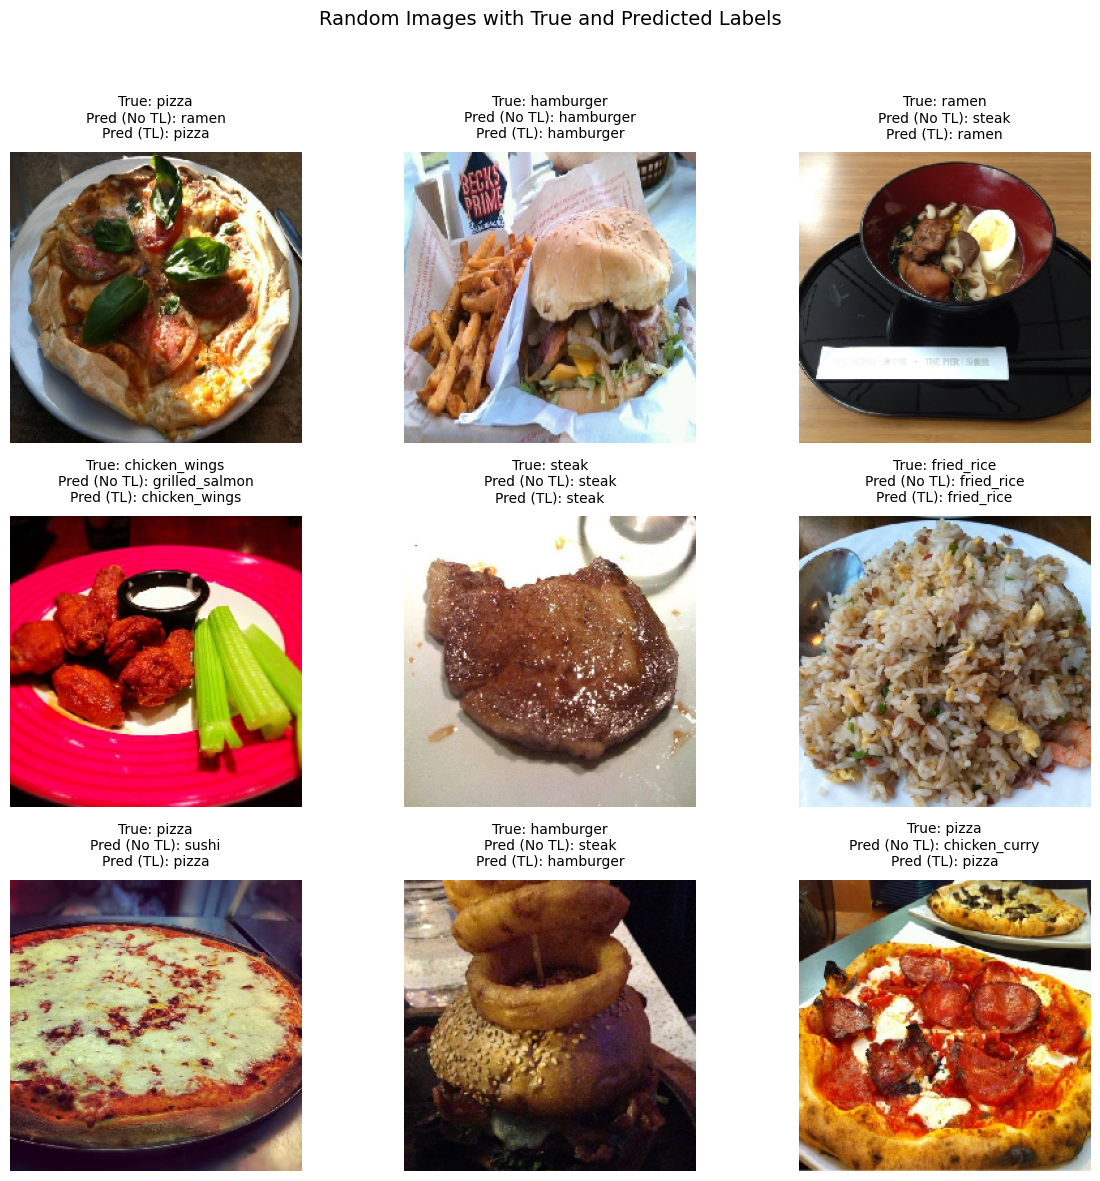

In [55]:
random_plot(test_data, class_names, model, efficientnet_model)